# Bayesian Inference

Matt Kenzie

### Statistical Estimation for Physics
*Example Lecture for Ass. Prof. in Data Intensive Science*

<font size=3>N.B. These slides run directly from a python notebook available [here](https://github.com/matthewkenzie/notebooks/blob/main/BayesianInference.ipynb)</font><br>
<font size=3> The notebook is self-contained and contains various code that is not explitly shown in the slides to generate the visulations</font>

## Bayes' Theorem

 - We have already seen <font color='blue'><b>Bayes' Theorem</b></font> in previous lectures 
 
$$ p(A|B) = \frac{p(B|A)p(A)}{p(B)} $$
 

 - We applied it to a couple of example problems to give <font color='blue'>probability estimates of outcomes</font> (and saw this might contradict our naive intuition)
    - Picking cards from a deck
    - The Monte Hall problem
    - The OJ Simpson case
    
    
 - We also saw one of the nice things about the Bayesian approach is that it allows us to <font color='blue'><b>incorporate previously acquired knowledge</b></font>

## <font color='red'><b>RECAP:</b></font> Marginal and conditional probability distributions

- For random variables $X$ and $Y$ with joint density function, $f(x,y)$, the <font color='blue'><b>marginal distribution</b></font> of $Y$ is

$$ f(y) = \int_X f(x,y) dx $$

- We showed that the <font color='blue'><b>conditional distributions</b></font> of $Y$ given $X=x$ and $X$ given $Y=y$ are 

$$ f(y|x) = \frac{f(x,y)}{f(x)} \;\;\;\;\;\; \text{and} \;\;\;\;\;\;\; f(x|y) = \frac{f(x,y)}{f(y)} $$

## <font color='red'><b>RECAP:</b></font> Derviation of Bayes' Theorem

-  And we therefore derived the <font color='blue'><b>theory of total probability</b></font>: 

$$ f(y) = \int_X f(y|x) f(x) dx \;\;\;\;\;\; \text{and} \;\;\;\;\;\;\; f(x) = \int_Y f(x|y) f(y) dy $$

 - And <font color='blue'><b>Bayes' theorem</b></font> which states that, for $f(x)>0$,
 
$$ f(y|x) = \frac{f(x|y)f(y)}{f(x)} = \frac{f(x|y)f(y)}{\int_Y f(x|y) f(y) dy}  $$

## Bayesian Inference

 - Recall that (statistical) *inference* in general is the process of <font color='blue'><b>deducing properties of a population or distribution from observed data</b></font>
 - We have already seen examples of this with <font color='blue'><b>least squares</b></font> and <font color='blue'><b>maximum likelihood</b></font> estimation
 - <font color='blue'><b>Bayesian inference</b></font> is the same process exploiting Bayes' Theorem

 - Consider a general problem in which we want to <font color='blue'><i>infer</i> the probability distribution</font> of a parameter, $\theta$, from an observed dataset, $x$
 - Bayes' theorem tells us that
 
$$ p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)} $$

 - Notice that in Bayesian analysis both the <font color='blue'>observable</font>, $x$, *and* the <font color='blue'>parameter</font>, $\theta$, are random variables with probability distributions
 - In the classical (frequentist) treatment, <font color='blue'>parameters are fixed</font>
 


### The terms in Bayes' theorem
$$ \color{blue}{p(\theta|x)} = \frac{\color{red}{p(x|\theta)}\color{green}{p(\theta)}}{\color{magenta}{p(x)}} = \frac{\color{red}{p(x|\theta)}\color{green}{p(\theta)}}{\color{magenta}{\int p(x|\theta) p(\theta) d\theta}} $$

- $\color{green}{p(\theta)}$ is called the "**<font color='green'>prior</font>**" distribution
  - represents our *prior beliefs* about the parameter $\theta$ (which could be nothing)

 - $\color{red}{p(x|\theta)}$ we have already encountered (see previous lectures) and is the "**<font color='red'>likelihood</font>**"
    - represents the *agreement between our model and our observed data*

 - $\color{blue}{p(\theta|x)}$ is known as the "**<font color='blue'>posterior</font>**" distribution
    - represents our *knowledge* of the parameter *after* including the data *and* prior beliefs
    - this is what we have *inferred* about the parameter $\theta$ given the data $x$

 - $\color{magenta}{p(x)}$ is the marginal distribution of the data, sometimes called the "**<font color='magenta'>estimate</font>**"
    - *it is not* a function of $\theta$ so just a number which normalises the posterior
    - we do not normally care about its value because it just scales the posterior

 - So for inference of the posterior distribution *shape* we can simply make use of

$$ \color{blue}{p(\theta|x)} \propto \color{red}{p(x|\theta)} \color{green}{p(\theta)} $$


$$ \color{blue}{\text{Posterior}} \propto \color{red}{\text{Likelihood}} \times \color{green}{\text{Prior}} $$

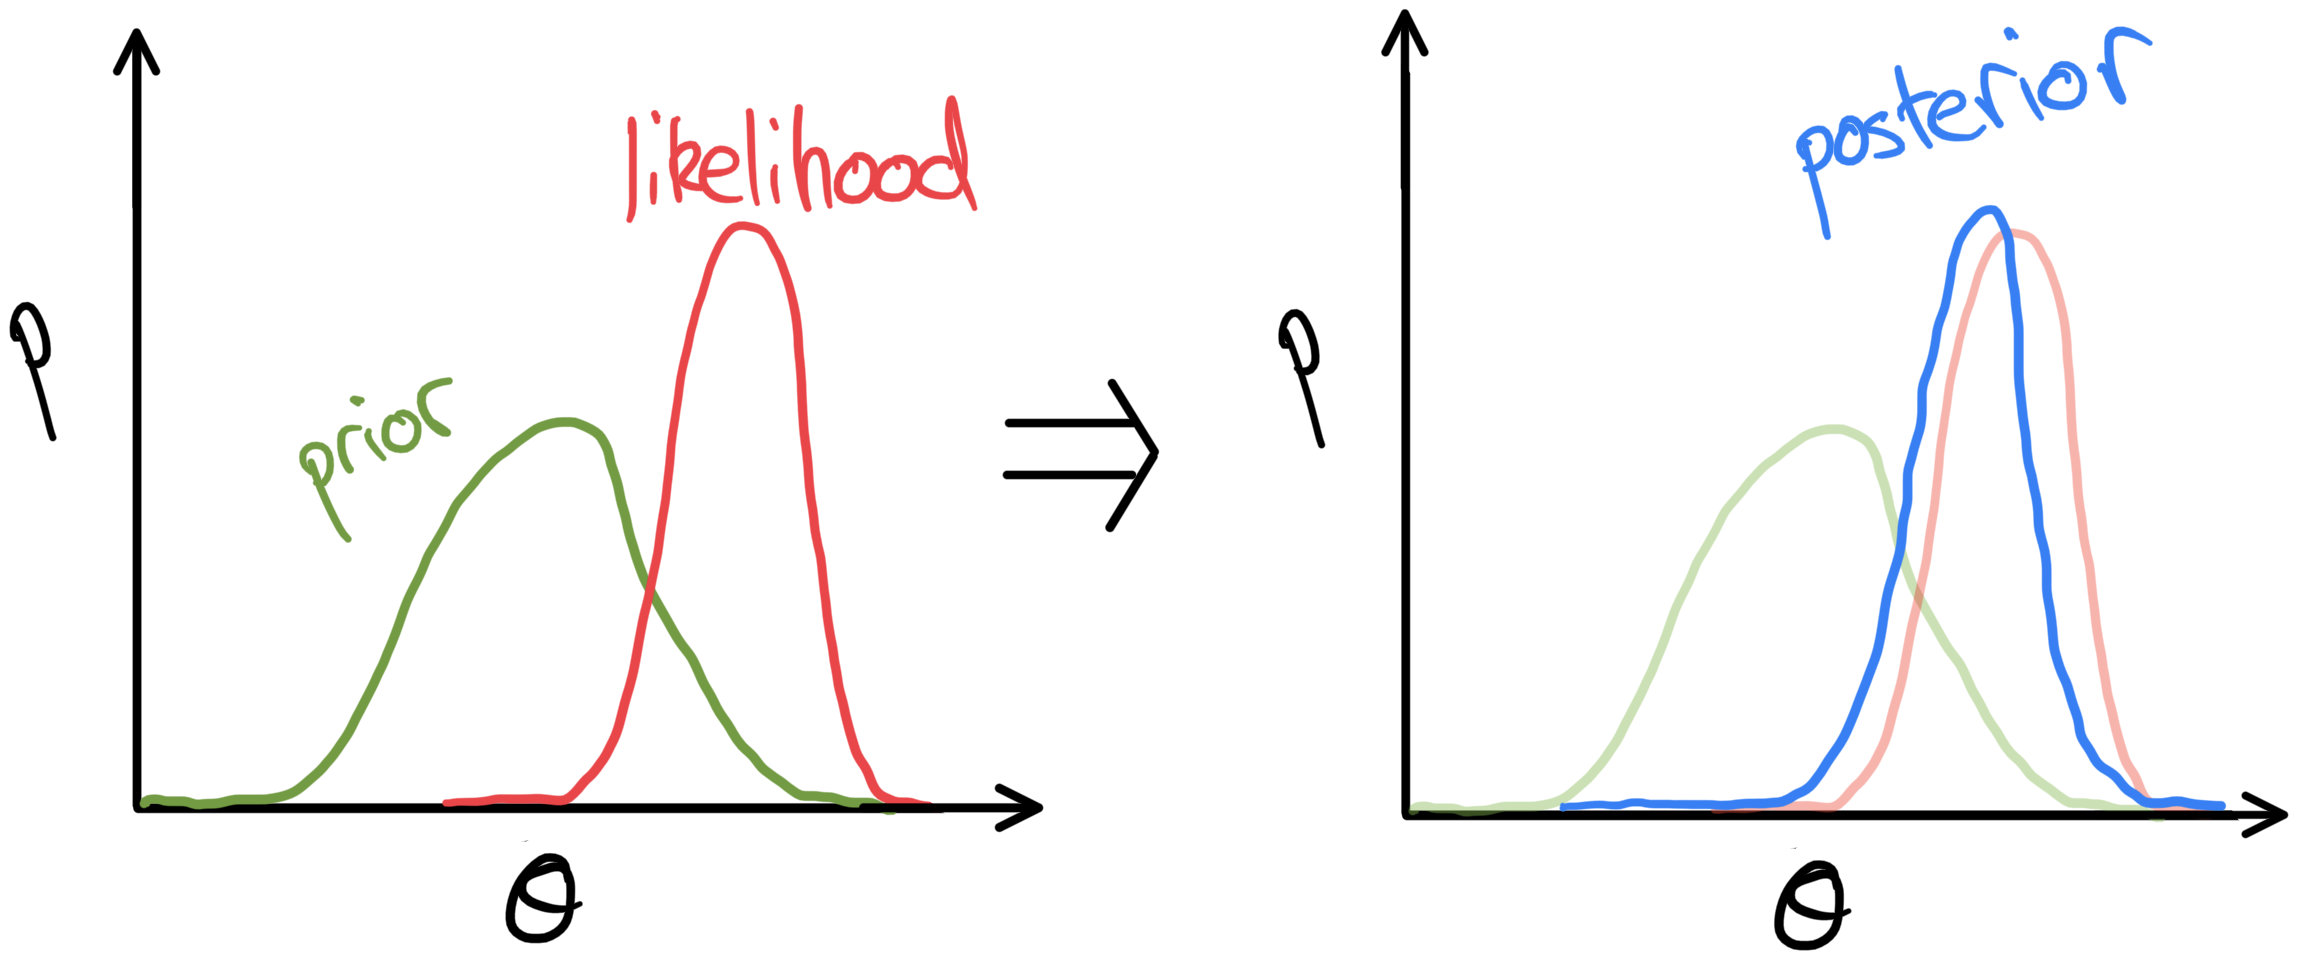

## A Bayesian Inference Example

 - Assume we have some data which <font color='blue'>measures the mass of a new particle</font>
 - We will use this data to <font color='red'><i>infer</i> a probability distribution for the particle mass</font>

**Step 1.** Let's generate our data (say 200 events) assuming a <font color='blue'><b>true mass</b></font> of $\mu = 3$GeV  and a resolution of $\sigma = 1$GeV following a normal distribution

In [1]:
import numpy as np
np.random.seed(111111) # set a reproducible seed
data = np.random.normal(3,1, size=200)

- It's <font color='blue'>always a good idea to visualise</font> our data (and our analysis in general)
  - Enhances understanding, avoids common pitfalls and mistakes
  - Look at the [full ipynb notebook for these slides](https://github.com/matthewkenzie/notebooks/blob/main/BayesianInference.ipynb) to see the code that lives inside the `plot_our_data()` function

In [2]:
# I like the widget backend for matplotlib which allows us
# to interactively play with plots
%matplotlib widget
import matplotlib.pyplot as plt

In [3]:
# This widget backend decides to put a very large and unneccesary title bar
# on every plot so I'm going to disable that with the snippet below

In [4]:
%%html
<style>
div.jupyter-widgets.widget-label {display: none;}
</style>

In [5]:
from scipy.stats import norm
def plot_our_data():
    
    # make the plot figure and axis
    fig = plt.figure('Data Visualisation')
    ax = fig.add_subplot()
       
    # histogram the data (note I make use of the Freedman-Draconis rule
    # to determine the binning)
    nh, xe = np.histogram(data, bins="fd")
    
    # get the histogram bin centres
    cx = 0.5*(xe[:-1]+xe[1:])
    
    # draw the histogram entries as points with error bars
    # each histogram bin is a count of events so the error
    # in each bin is Poisson in nature and given by the square
    # root of the number
    ax.errorbar(cx, nh, yerr=nh**0.5, fmt='ko', markersize=4, capsize=3, label='Data histogram')
    
    # make a little scatter plot to show where the data fall
    scat_y = np.full_like(data, -ax.get_ylim()[1]*0.1)
    ax.scatter(data,scat_y, s=7, alpha=0.2, color='k', label='Data density')
    
    # overlay the true distribution we generated from
    
    # create a linear space along the x axis
    x = np.linspace(xe[0],xe[-1],400)
    
    # compute the true probability of each value
    # given we know the true Gaussian distribution
    # we generated from
    y = norm(3,1).pdf(x)
    
    # calculate the proper normalisation given the bin width
    # and number of events
    N = len(data)*(xe[1]-xe[0])
    
    # plot it
    ax.plot(x,N*y, label='Generating distribution')
    
    # make a legend
    ax.legend()
    
    # set some axis labels
    ax.set_xlabel('$x$')
    ax.set_ylabel('$N$')
    
    # bin the white space
    fig.tight_layout()

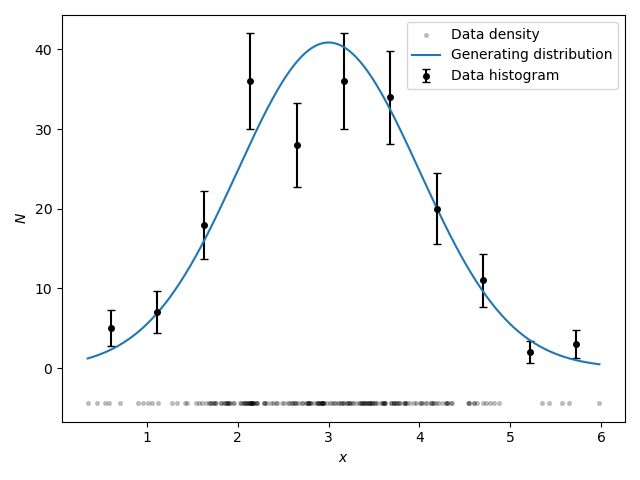

In [6]:
plot_our_data()

**Step 2.** Now lets compute our likelihood

 - This is based on some model <font color='blue'><i>we believe</i></font> will be appropriate for our data
 - In this case we will use the normal distribution 
   - in real life we may or may not know the true distribution


 - **Remember**, the likelihood <font color='red'><b>is not the same as the probability density</b></font> although they are computed in a similar way
 
$$ L(\vec{\theta}|X) = p(x|\vec{\theta}) = \prod_{i}^N p(X_i|\vec{\theta}) $$

 - The likelihood depends on the dataset we have and is a function of the parameter(s) we want to estimate

 - The Likelihood in our case is then the <font color='blue'><b>product</b></font> over our observed data of a <font color='red'><b>Gaussian distribution</b></font> dependent on the parameters $\mu$ and $\sigma$

$$ L(\mu,\sigma | X) = p(x|\mu,\sigma) = \prod_{i}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{(X_i-\mu)^2}{2\sigma^2}\right] $$

In [7]:
def our_likelihood(mu, sigma):
    N = 1 / ( sigma * np.sqrt( 2 * np.pi ) )
    pdf = N * np.exp( -(data-mu)**2 / (2*sigma**2) )
    return np.prod(pdf)

 - Let's now visualise our likelihood
    - Look at the [full ipynb notebook for these slides](https://github.com/matthewkenzie/notebooks/blob/main/BayesianInference.ipynb) to see the code that lives inside the `plot_our_likelihood()` function

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# parameter ranges
mu_range = (2.7,3.3)
sg_range = (0.8,1.2)

def plot_our_likelihood():
    
    # make the plot figure and axis
    fig = plt.figure('Our Likelihood', figsize=(9,6))
    ax = fig.add_subplot(projection='3d')  

    # make linear spaces
    x = np.linspace(*mu_range,100)
    y = np.linspace(*sg_range,100)
    
    # mesh these into a grid
    X, Y = np.meshgrid(x,y)
    
    # the `our_likelihood()` method is not vectorised
    # in other words it expects its arguments (mu, sigma)
    # to be scalars (just numbers). passing vectors will
    # confuse it because it doesn't know how to perform
    # `data-mu` or what dimension to perform the prod on
    # we can make a vectorised version (note, this is a 
    # wrapper that will not increase performance)
    vec_our_likelihood = np.vectorize( our_likelihood )
    
    # draw the surface
    ax.plot_surface(X,Y, vec_our_likelihood(X,Y), cmap=cm.coolwarm )
    
    # set some axis labels
    ax.set_xlabel('$\mu$')
    ax.set_ylabel('$\sigma$')
    ax.set_zlabel('$L(\mu,\sigma|X)$')
    
    # tidy axes
    ax.set_xticks(np.linspace(*mu_range,7))
    ax.set_yticks(np.linspace(*sg_range,5))
    ax.set_xlim(mu_range)
    ax.set_ylim(sg_range)
    
def plot_our_1d_likelihood(sg=False):
    
    # make the plot figure and axis
    fig = plt.figure('Our 1D Likelihood')
    ax = fig.add_subplot()
    
    # parameter ranges
    mu_range = (2.7,3.3)
    sg_range = (0.8,1.2)
    
    if sg:
        x = np.linspace(*sg_range,200)
        y = [ our_likelihood(3,xi) for xi in x ]
        ax.set_xlabel('$\sigma$')
        ax.set_ylabel('$L(\sigma|X)$')
        y /= np.max(y)
        ax.plot(x,y)  

    else:
        x = np.linspace(*mu_range,200)
        y = [ our_likelihood(xi,1) for xi in x ]
        ax.set_xlabel('$\mu$')
        ax.set_ylabel('$L(\mu|X)$')
        y /= np.max(y)
        ax.plot(x,y, label='Numerical')
        y = norm.pdf(x,np.mean(data),1/np.sqrt(len(data)))
        y /= np.max(y)
        ax.plot(x,y,ls='--', label='Analytical')
        ax.legend()
        
    fig.tight_layout()
    

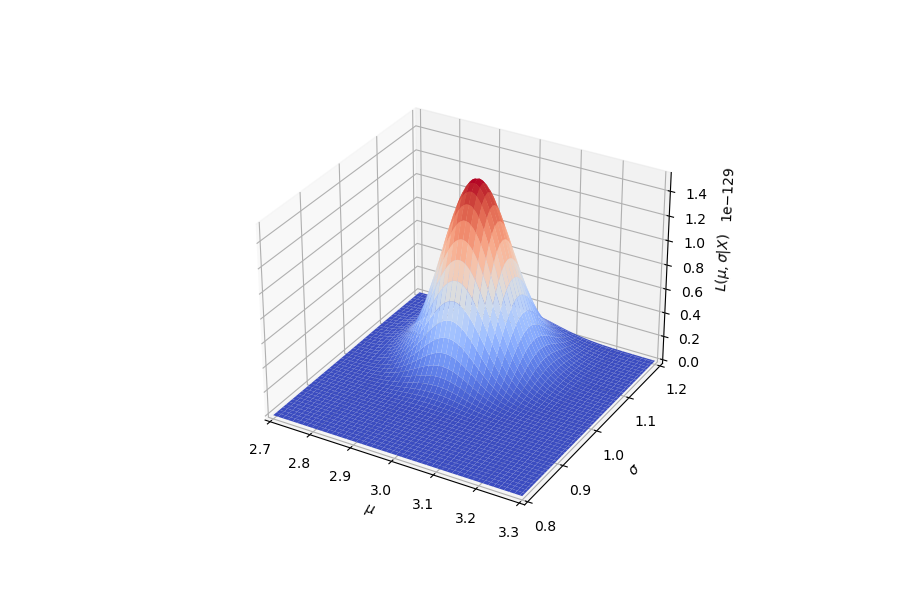

In [9]:
plot_our_likelihood()

 - For a moment let's simplify this two-dimensional problem ($\mu$ and $\sigma$) to a one-dimensional problem
 - Assume we know the true width, $\sigma=1$, so now $L$ only depends on $\mu$
 - This will be a normal distribution with the mean of our data and a width of the standard error on the mean (<font color='red'>this is <b>not</b> a width  of $\sigma=1$</font>)

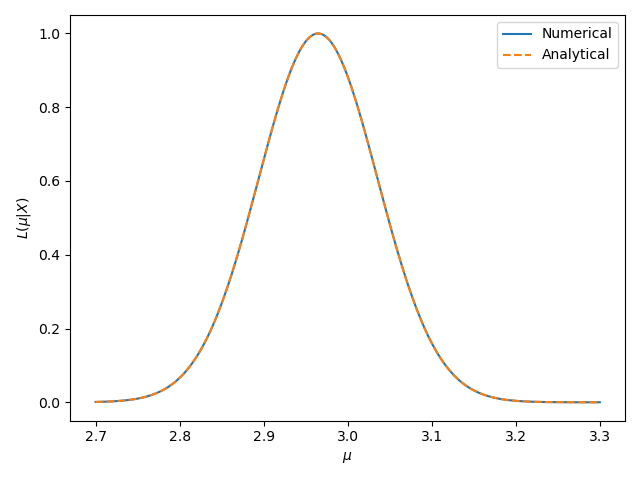

In [10]:
plot_our_1d_likelihood()

**Step 3.** Investigate various choices of priors
 - Start with a <font color='blue'>uniform prior</font> (we have no knowledge) - give a wide range $2.7 \leq \mu \leq 3.3$
 - Use a <font color='blue'>wide (non-informative) prior</font>, $p(\mu) = \text{Norm}(3.3,0.4)$
 - Use an <font color='blue'>informative prior</font>, perhaps based on a previous measurement, $p(\mu) = \text{Norm}(2.8,0.15)$
 - Use a <font color='blue'>very informative prior</font>, with a narrow width, $p(\mu) = \text{Norm}(3.1,0.03)$

In [11]:
# define the uniform and normal distributions
# (note we could get these from scip.stats or numba_stats)

def uniform(x,a,b):
    return np.full_like(x,1/(b-a))

def normal(x,mu,sg):
    return 1/(sg*np.sqrt(2*np.pi)) * np.exp( -((x-mu)**2)/(2*sg**2) )

# make a list of our prior means and widths
# the first one is just the range of the uniform prior
prior_opts = [ (2.7,3.3), 
               (3.3,0.4),
               (2.8,0.15),
               (3.1,0.03),
             ]

# make the list of prior functions
priors = [ lambda x: uniform(x,*prior_opts[0]),
           lambda x: normal(x,*prior_opts[1]),
           lambda x: normal(x,*prior_opts[2]),
           lambda x: normal(x,*prior_opts[3])
         ]

# make the likelihood function
lmu = np.mean(data)
lsg = 1/np.sqrt(len(data))
likelihood = lambda x: normal(x, lmu, lsg)

# compute the posterior distribution
# these will also be normally distributed 
# becuase the product of a normal and uniform
# is normal and the product of two normals is also
# normal
posterior_opts = [ (lmu, lsg) ]

for propt in prior_opts[1:]:
    pmu = propt[0]
    psg = propt[1]
    
    nmu = (lmu*psg**2 + pmu*lsg**2) / (psg**2 + lsg**2)
    nsg = np.sqrt( (psg**2 *lsg**2) / (psg**2 + lsg**2) )
    
    posterior_opts.append( (nmu, nsg) )

# make the posterior list
posteriors = [ lambda x: normal(x, lmu, lsg), 
               lambda x: normal(x, *posterior_opts[1]),
               lambda x: normal(x, *posterior_opts[2]),
               lambda x: normal(x, *posterior_opts[3]),
             ]


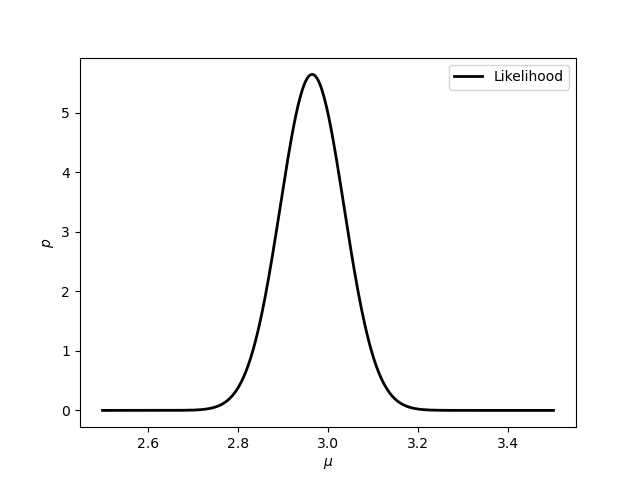

In [12]:
# make some plot widgets
# some of the code below is a bit fancy and makes use of the ipywidgets library
# to make a plot that's interactive and we can change parameters of
# this is just for aesthetics, the important stuff for the science is in `our_posterior_plot()`

import ipywidgets as widgets
from scipy.integrate import quad
w_plt_prior     = widgets.Checkbox(value=False, description='Show Prior'    , indent=True)
w_plt_posterior = widgets.Checkbox(value=False, description='Show Posterior', indent=True)
opts = [('Flat',0)]
for i, opt in enumerate(prior_opts[1:]):
    opts.append( (f'Normal({opt[0]},{opt[1]})',i+1) )
    
w_prior = widgets.Dropdown( 
    options=opts,
    value=0,
    description='Select Prior'
)
# group them 
items = [ w_prior, w_plt_prior, w_plt_posterior]
widget_knobs = widgets.HBox(items)

# make the figure
prange = (2.5,3.5)

# make a linear space
x = np.linspace(*prange,400)

# normalise and evaluate the likelihood
N = quad( our_likelihood, *prange, args=(1,))[0]
L = np.array( [ our_likelihood(xi,1) for xi in x ] ) / N

# normalise and evaluate the priors
pr_Ns = [ quad(pr, *prange)[0] for pr in priors ]
pl_priors  = [ priors[i](x) / pr_Ns[i] for i in range(4) ]

# normalise and evaluate the posteriors
pst_Ns =  [ quad(pst, *prange)[0] for pst in posteriors ]
pl_posteriors = [ posteriors[i](x) / pst_Ns[i] for i in range(4) ]

# posterior plot function
#fig = plt.figure('Investigating different priors')
#axis = fig.gca()
fig, axis = plt.subplots()

def our_posterior_plot(prior=prior_opts, plot_prior=False, plot_posterior=False):
    
    #fig = plt.figure(12)
    #ax = fig.add_subplot()
    #plt.cla()
    #plt.figure(2)
    plt.cla()
    
    # plot likelihood
    axis.plot(x, L, lw=2, c='k', label='Likelihood')
    
    # plot prior
    if plot_prior:
        axis.plot(x, pl_priors[prior], ls=':', c='b', lw=2, label='Prior')

    # plot posterior
    if plot_posterior:
        axis.plot(x, pl_posteriors[prior], ls='--', c='r', lw=2, label='Posterior')
    
    # add axis labels
    axis.set_xlabel('$\mu$')
    axis.set_ylabel('$p$')
    
    # make legend
    axis.legend()
    
# widget to argument dict
warg_d = {'prior': w_prior, 'plot_prior': w_plt_prior, 'plot_posterior': w_plt_posterior}

# make the plot function interactive with widgets
# there are much simpler ways to do this (with e.g. simply the `interact()` function)
# however I want to display widgets next to each other so wrap them in a box and this
# needs a bit more jiggery-pokery with the `interactive_output()` function
# see https://ipywidgets.readthedocs.io for more info on widgets
plot = widgets.interactive_output( our_posterior_plot, warg_d )

- Once again look in the [full ipynb notebook for these slides](https://github.com/matthewkenzie/notebooks/blob/main/BayesianInference.ipynb) to see the code that provides `widget_knobs` and `plot`

Output()

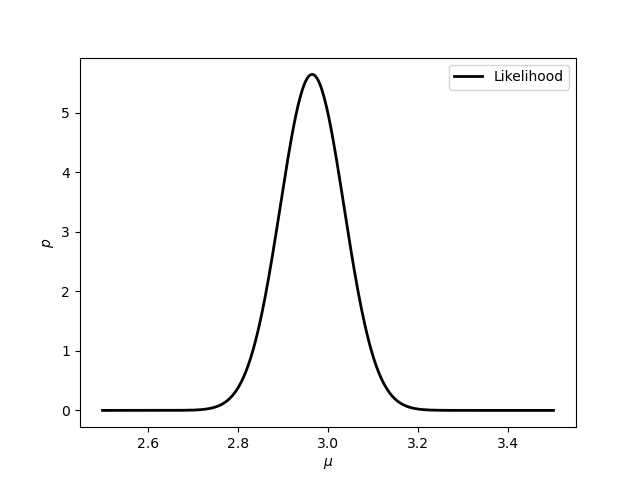

In [13]:
display(widget_knobs, plot)
plt.show()

### Conjugate Priors

 - Why did I use Gaussians for my example?
 - A product of Gaussians is also Gaussian which means that the posterior and prior are both from the same family of distributions
 - This is an example of a <font color='blue'><b>conjugate prior</b></font>
   - We often work hard to use / find conjugate priors to benefit from this
 - Having a Gaussian posterior makes the  <font color='blue'><b>point estimate</b></font> and  <font color='blue'><b>interval estimation</b></font> of our parameter trivial

    

### Point-estimates and intervals from the posterior

 - Now we have determined the <font color='blue'><b>posterior distribution</b></font> we can determine an <font  color='blue'><b>inferred value</b></font> and <font color='blue'><b>uncertainty</b></font> from this
 - The value (or point estimate) can be the <i>mode</i>, <i>median</i>, <i>mean</i> or something else of the posterior.
   - These are all the same for a Gaussian
   - Often depends on the actual posterior distribution
   - Normally use the <font color='blue'><b>maximum a posteriori probablity (MAP)</b></font> estimate, i.e. the mode
 - The credible interval is often the <font color='blue'><b>Highest Density Interval (HDI)</b></font> but could be the *Equal-Tailed Interval (ETI)*, *RMS* or something else
   - These are all the same for a Gaussian
 - **Coding tip**: *For computing the HDI I suggest taking advantage of algorithms from the excellent [`arviz`](https://arviz-devs.github.io/arviz/index.html) package*

### The posterior distribution
 - Now we can visualise the posterior with the <font color='blue'><b>point estimate</b></font> and <font color='blue'><b>credible intervals</b></font> and <font color='red'><b>compare to the MLE</b></font> from previous lectures
 - Once again see the [full notebook](https://github.com/matthewkenzie/notebooks/blob/main/BayesianInference.ipynb) for the code inside `our_posterior_plot()` and `our_mle_plot()`

In [14]:
from scipy.stats import chi2
def our_posterior_plot(ax=None):
    
    ax = ax or plt.gca()
    
    prange = (2.5,3.5)
    x = np.linspace(*prange,400)
    
    ipst = 0
    mu = posterior_opts[ipst][0]
    sg = posterior_opts[ipst][1]
    
    N = quad( posteriors[ipst], *prange)[0]
    p = posteriors[ipst](x) / N
    
    sigmas = [1,2,3]
    cols = ['lightcoral','indianred','darkred']
    for sigma, col in zip(reversed(sigmas),cols):
        ci = chi2.cdf(sigma**2,1)
        interval = (mu-sigma*sg,mu+sigma*sg)
        xint = np.linspace(*interval,200)
        yint = posteriors[ipst](xint)/N
        ax.fill_between(xint,0,yint,color=col,label=f'${ci:.1%}$% HDI')
        if sigma==1:
            err = (interval[1]-interval[0])/2
    
    ax.plot([mu,mu], [0,posteriors[ipst](mu)/N], 'k--', label='MAP')
    ax.plot(x, p, ls='-', lw=2, label='Posterior')
    
    ax.legend()
    ax.set_xlabel(r'$\mu$')
    ax.set_ylabel(r'$p(\mu|x)$')
    ax.text(0.05,0.9, f'$\\mu = {mu:3.2f} \pm {sg:3.2f}$', fontsize=14, transform=ax.transAxes)
    ax.set_ylim(bottom=0)
    ax.set_xlim(prange)


In [15]:
# what about a comparison with the MLE from last time?

# load minuit minimiser
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
# scipy interpolator for nice plots
from scipy.interpolate import interp1d

def find_crossing( x, y, cross, xmin ):
    
    lower = interp1d( y[x<xmin], x[x<xmin], kind='quadratic' )
    upper = interp1d( y[x>xmin], x[x>xmin], kind='quadratic' )

    return lower(cross), upper(cross)

def our_mle_plot(ax=None):

    ax = ax or plt.gca()
    
    # create the nll cost function
    nll = UnbinnedNLL(data, normal)

    # minimise it
    mi = Minuit(nll, mu=3,sg=1)
    mi.fixed['sg'] = True
    mi.migrad()
    mi.hesse()

    # these are the mu value and -2logL values
    # at the minimum
    xmin = mi.values['mu']
    fmin = mi.fval

    # scan values of x for the profiled likelihood
    nll = []
    for xpt in x:
        mi.values['mu'] = xpt
        mi.fixed['mu'] =  True
        mi.migrad()
        nll.append( mi.fval )

    # add the best fit point
    nll = np.array(nll)
    nll  = np.concatenate( [nll[x<xmin], [fmin], nll[x>xmin]] )
    xval = np.concatenate( [x[x<xmin], [xmin], x[x>xmin]] )

    # compute the Delta Log Likelihood
    nll -= fmin

    # smooth it to find crossing points
    smooth = interp1d(xval, nll)

    sigmas = [1,2,3]
    cols = ['lightcoral','indianred','darkred']
    
    for sigma, col in zip(reversed(sigmas), cols):
        ci = chi2.cdf(sigma**2,1)
        low, up = find_crossing(xval, nll, sigma**2, xmin)
        #print(low,up)
        xint = np.linspace(low,up,200)
        ax.fill_between(xint,0,smooth(xint), color=col, label=f'${ci:.1%}$% CL')
        if sigma==1:
            err = (up-low)/2
    
    ax.plot(xval,nll,lw=2,label='Likelihood')
    ax.legend(loc='lower right')
    ax.set_xlim(prange)
    ax.set_ylim(bottom=0,top=15)
    ax.set_xlabel(r'$\mu$')
    ax.set_ylabel(r'$-2\Delta\ln L(\mu|X)$')
    ax.text(0.5,0.9, f'$\\mu = {xmin:3.2f} \pm {err:3.2f}$', ha='center', fontsize=14, transform=ax.transAxes)  
    

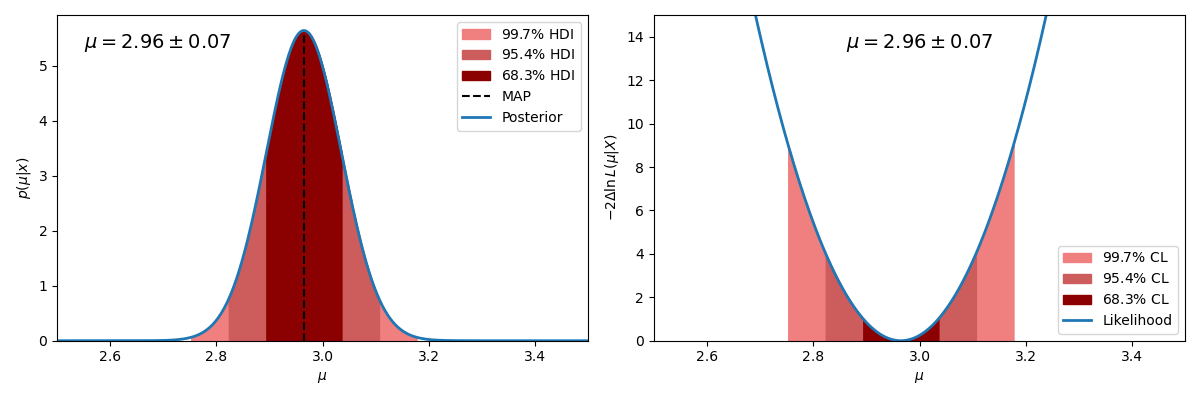

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
our_posterior_plot(ax=ax[0])
our_mle_plot(ax=ax[1])
fig.tight_layout()

## Comments on real world applications

 - In this simple 1D case we could actually analytically write down the posterior
 - In practise it is often not as simple as this, normally it needs to be done numerically (I give another example in [this noteboook](https://github.com/matthewkenzie/notebooks/blob/main/BayesianInferenceExpon.ipynb))
 - In multi-dimensional problems you get a multi-dimensional posterior which you then need to marginalise (integrate).
 - Quite often we then actually produce the posterior by sampling from it using Markov Chain Monte Carlo (MCMC) and there are some very good packages for doing this.
 - But that is for another day...